In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Q4. Solve ISLP Ch.3, Exercise #10


In [11]:
import pandas as pd
Carseats = pd.read_csv('/content/drive/MyDrive/MLDL/Carseats.csv')
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


##(a) Fit a multiple regression model to predict Sales using Price, Urban, and US.


In [12]:
Carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [13]:
Carseats.isna().sum().sort_values(ascending=False)

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

Urban, US - qualitative

Price - quantitative


In [14]:
predictor = Carseats[['Price', 'Urban', 'US']]
predictor

,Price,Urban,US
0,120,Yes,Yes
1,83,Yes,Yes
2,80,Yes,Yes
3,97,Yes,Yes
4,128,Yes,No
...,...,...,...
395,128,Yes,Yes
396,120,No,Yes
397,159,Yes,Yes
398,95,Yes,Yes


In [15]:
sales = Carseats[['Sales']]
sales

,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15
...,...
395,12.57
396,6.14
397,7.41
398,5.94


In [16]:
print(list(predictor.columns))

['Price', 'Urban', 'US']


In [17]:
data_dumm = pd.get_dummies(predictor)
print(list(data_dumm))
data_dumm.head(5)

['Price', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes']


,Price,Urban_No,Urban_Yes,US_No,US_Yes
0,120,0,1,0,1
1,83,0,1,0,1
2,80,0,1,0,1
3,97,0,1,0,1
4,128,0,1,1,0


In [18]:
data_dumm['Urban'] = data_dumm['Urban_Yes']
data_dumm['US'] = data_dumm['US_Yes']
data_dumm.drop(['Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'], axis=1, inplace=True)
data_dumm.head(10)

,Price,Urban,US
0,120,1,1
1,83,1,1
2,80,1,1
3,97,1,1
4,128,1,0
5,72,0,1
6,108,1,0
7,120,1,1
8,124,0,0
9,124,0,1


In [19]:
from sklearn.linear_model import LinearRegression
X = data_dumm.values
Y = sales.values
model = LinearRegression()
model.fit(X, Y)
print(model.intercept_, model.coef_, model.score(X,Y))

[13.04346894] [[-0.05445885 -0.02191615  1.2005727 ]] 0.23927539218405547


##(b)

In [20]:
!pip install statsmodels

In [21]:
import pandas as pd
import statsmodels.api as sm

x = sm.add_constant(data_dumm)
y = sales.values
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           2.39e-23
Time:                        18:10:20   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

## (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [22]:
data_dumm.head(10)

,Price,Urban,US
0,120,1,1
1,83,1,1
2,80,1,1
3,97,1,1
4,128,1,0
5,72,0,1
6,108,1,0
7,120,1,1
8,124,0,0
9,124,0,1


In [23]:
data_dumm.drop(['Urban'],axis=1, inplace=True)

x = sm.add_constant(data_dumm)
y = sales.values
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           2.66e-24
Time:                        18:10:20   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

##(g)


In [24]:
cons_co = 13.0308
cons_std = 0.631

price_co = -0.0545
price_std = 0.005

us_co = 1.1996
us_std = 0.258

print('95%% confidence interval for Intercept: [ %2.4f; %2.4f] ' % (cons_co-2*cons_std, cons_co+2*cons_std))
print('95%% confidence interval for Price: [ %2.4f; %2.4f] ' % (price_co-2*price_std, price_co+2*price_std))
print('95%% confidence interval for US: [ %2.4f; %2.4f] ' % (us_co-2*us_std, us_co+2*us_std))

95% confidence interval for Intercept: [ 11.7688; 14.2928] 
95% confidence interval for Price: [ -0.0645; -0.0445] 
95% confidence interval for US: [ 0.6836; 1.7156] 


##(h)

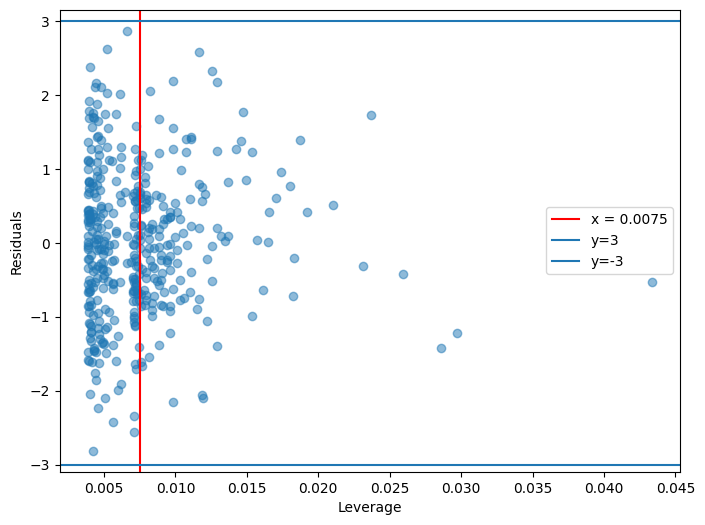

In [25]:
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(model)
standard_residuals = influence.resid_studentized_internal
plt.figure(figsize=(8,6))
plt.scatter(influence.hat_matrix_diag, standard_residuals, alpha=0.5)
avg = 3/400
plt.axvline(x=avg, color='red', label=f'x = {avg}')
outliers_1 = 3
outliers_2 = -3
plt.axhline(y=outliers_1, label=f'y={outliers_1}' )
plt.axhline(y=outliers_2, label=f'y={outliers_2}' )
plt.xlabel('Leverage')
plt.ylabel('Residuals')
plt.legend()
plt.show()

#Q5. Solve ISLP Ch.3, Exercise #14

In [26]:
import numpy as np

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5*x1+rng.normal(size=100)/10
y = 2+2*x1+0.3*x2+rng.normal(size=100)

##(b)


[[1.        0.7723245]
 [0.7723245 1.       ]]


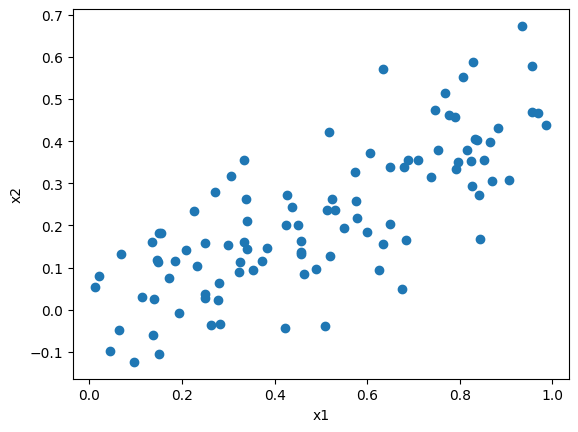

In [27]:
print(np.corrcoef(x1, x2))
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

##(c)

In [28]:
X = pd.DataFrame({'x1': x1, 'x2':x2})
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           5.76e-08
Time:                        18:10:21   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

##(d)

In [29]:
X = pd.DataFrame({'x1': x1})
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           1.37e-08
Time:                        18:10:21   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

##(e)

In [30]:
X = pd.DataFrame({'x2': x2})
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           7.43e-07
Time:                        18:10:21   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

##(g)

In [31]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

In [32]:
X = pd.DataFrame({'x1': x1, 'x2':x2})
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           4.60e-08
Time:                        18:10:21   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.192     10.720      0.0

In [33]:
X = pd.DataFrame({'x1': x1})
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           9.23e-07
Time:                        18:10:21   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0739      0.201     10.310      0.0

In [34]:
X = pd.DataFrame({'x2': x2})
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           3.13e-08
Time:                        18:10:21   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2840      0.151     15.088      0.0

##(h)

<Axes: xlabel='x1', ylabel='x2'>

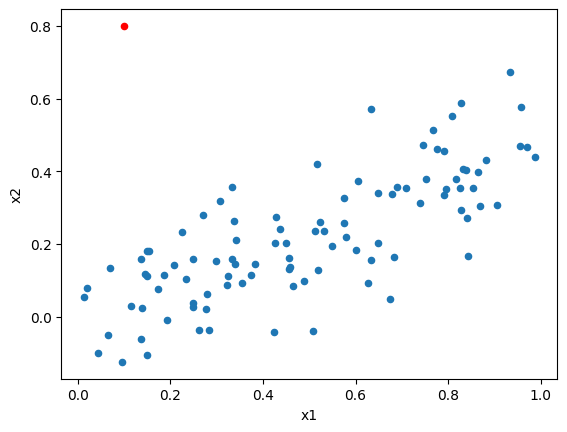

In [35]:
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
new = df.iloc[-1:]
origin = df.iloc[:-1]
both = origin.plot(kind='scatter', x='x1', y='x2')
new.plot(ax=both,kind='scatter', x='x1', y='x2', color='red' )

<Axes: xlabel='x1', ylabel='y'>

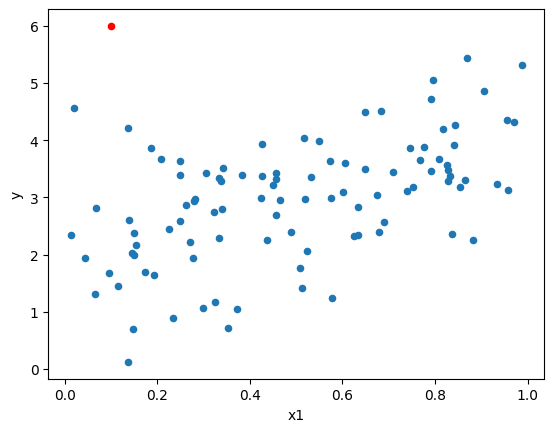

In [36]:
both = origin.plot(kind='scatter', x='x1', y='y')
new.plot(ax=both,kind='scatter', x='x1', y='y', color='red' )

<Axes: xlabel='x2', ylabel='y'>

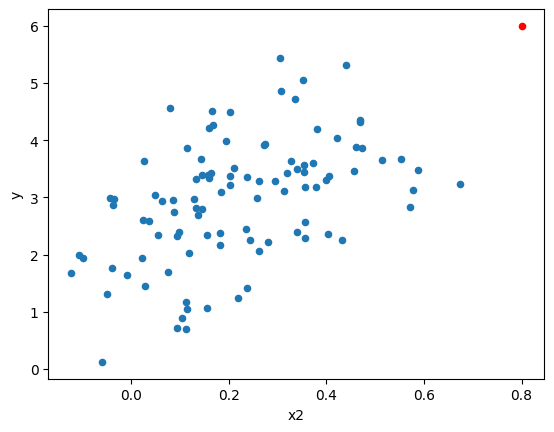

In [37]:
both = origin.plot(kind='scatter', x='x2', y='y')
new.plot(ax=both,kind='scatter', x='x2', y='y', color='red' )

#Q9. Solve ISLP Ch.4, Exercise #13


##(a)

In [38]:
import pandas as pd
Weekly = pd.read_csv('/content/drive/MyDrive/MLDL/Weekly.csv')
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [39]:
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [40]:
Weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


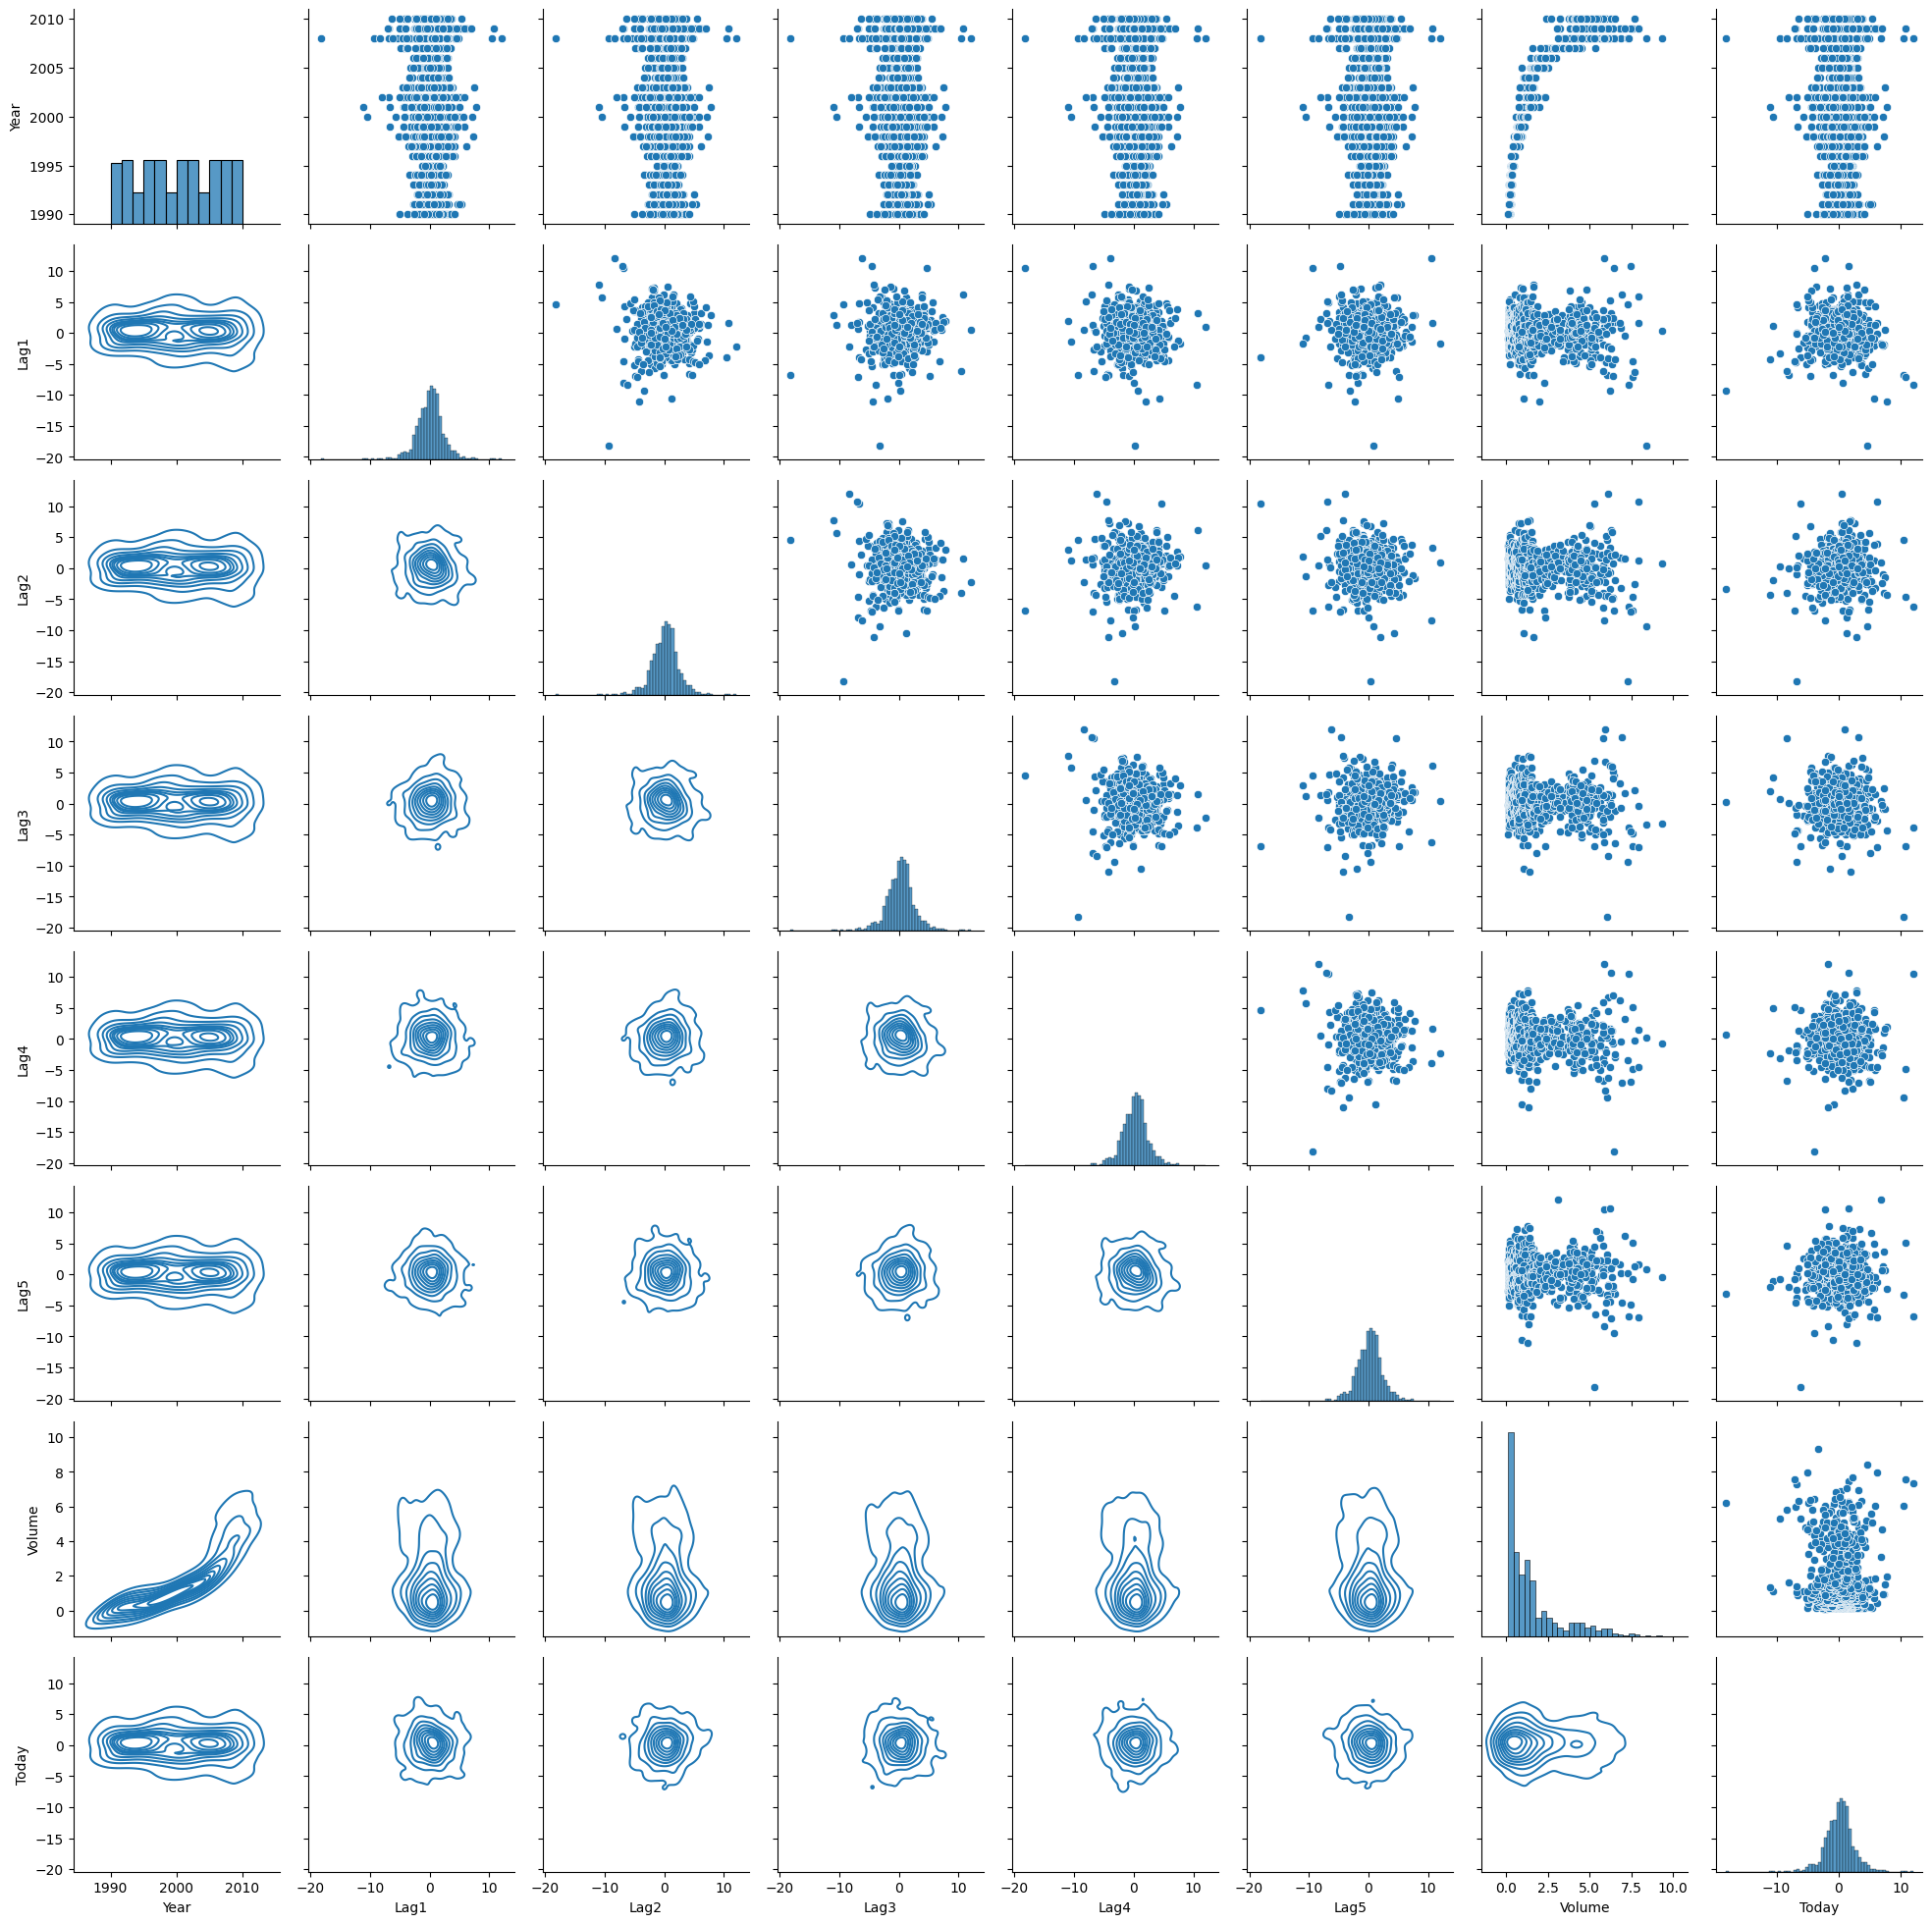

In [41]:
import matplotlib as plt
import seaborn as sns

g = sns.PairGrid(Weekly)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

##(b) logistic regression with Direction as the response and the five lag plus volume as predictors.

In [42]:
import pandas as pd
import statsmodels.api as sm
data_dumm = pd.get_dummies(Weekly)
data_dumm['Direction'] = data_dumm['Direction_Up']
x = sm.add_constant(Weekly[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']])
y = data_dumm['Direction'].values
model = sm.Logit(y,x).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 1.925080
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sat, 23 Sep 2023   Pseudo R-squ.:                     inf
Time:                        18:11:34   Log-Likelihood:                -2096.4
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:4465: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


##(C)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
predicted_prob = model.predict(x)
threshold = 0.5
predicted_labels = (predicted_prob > threshold).astype(int)
cm = confusion_matrix(y, predicted_labels)
accuracy = accuracy_score(y, predicted_labels)

print("Confusion Matrix:\n", cm, '\nAccuracy:', accuracy)

Confusion Matrix:
 [[ 54 430]
 [ 48 557]] 
Accuracy: 0.5610651974288338


##(d)

In [44]:
train_val = (Weekly['Year'] < 2009)
x_train = sm.add_constant(Weekly.loc[train_val, 'Lag2'])
y_train = (Weekly.loc[train_val, "Direction"] == 'Up').astype(int)
model = sm.Logit(y_train,x_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Sep 2023   Pseudo R-squ.:                0.003076
Time:                        18:11:34   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [45]:
x_test = sm.add_constant(Weekly.loc[~train_val, 'Lag2'])
y_test = (Weekly.loc[~train_val, "Direction"] == 'Up').astype(int)
predicted_prob = model.predict(x_test)
threshold = 0.5
predicted_labels = (predicted_prob > threshold).astype(int)
cm = confusion_matrix(y_test, predicted_labels)
accuracy = accuracy_score(y_test, predicted_labels)

print("Confusion Matrix:\n", cm, '\nAccuracy:', accuracy)

Confusion Matrix:
 [[ 9 34]
 [ 5 56]] 
Accuracy: 0.625


##(e)

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score

x_train = Weekly.loc[train_val, 'Lag2'].to_frame()
y_train = Weekly.loc[train_val, "Direction"]
x_test = Weekly.loc[~train_val, 'Lag2'].to_frame()
y_test = Weekly.loc[~train_val, "Direction"]
label_mapping = {'Down': 0, 'Up': 1}
y_true = y_test.map(label_mapping)
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

predicted_prob = lda.predict_proba(x_test)[:, 1]
threshold = 0.5
predicted_labels = (predicted_prob > threshold).astype(int)

cm = confusion_matrix(y_true, predicted_labels)
accuracy = accuracy_score(y_true, predicted_labels)

print("Confusion Matrix:\n", cm, '\nAccuracy:', accuracy)


Confusion Matrix:
 [[ 9 34]
 [ 5 56]] 
Accuracy: 0.625


##(f)

In [47]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
x_train = Weekly.loc[train_val, 'Lag2'].to_frame()
y_train = Weekly.loc[train_val, "Direction"]
x_test = Weekly.loc[~train_val, 'Lag2'].to_frame()
y_test = Weekly.loc[~train_val, "Direction"]
label_mapping = {'Down': 0, 'Up': 1}
y_true = y_test.map(label_mapping)
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

predicted_prob = qda.predict_proba(x_test)[:, 1]
threshold = 0.5
predicted_labels = (predicted_prob > threshold).astype(int)

cm = confusion_matrix(y_true, predicted_labels)
accuracy = accuracy_score(y_true, predicted_labels)

print("Confusion Matrix:\n", cm, '\nAccuracy:', accuracy)

Confusion Matrix:
 [[ 0 43]
 [ 0 61]] 
Accuracy: 0.5865384615384616


##(g)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
x_train = Weekly.loc[train_val, 'Lag2'].to_frame()
y_train = Weekly.loc[train_val, "Direction"]
x_test = Weekly.loc[~train_val, 'Lag2'].to_frame()
y_test = Weekly.loc[~train_val, "Direction"]
np.random.seed(200)
label_mapping = {'Down': 0, 'Up': 1}
y_true = y_test.map(label_mapping)
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

predicted_prob = knn_model.predict_proba(x_test)[:, 1]
threshold = 0.5
predicted_labels = (predicted_prob > threshold).astype(int)

cm = confusion_matrix(y_true, predicted_labels)
accuracy = accuracy_score(y_true, predicted_labels)

print("Confusion Matrix:\n", cm, '\nAccuracy:', accuracy)

Confusion Matrix:
 [[22 21]
 [32 29]] 
Accuracy: 0.49038461538461536


##(h)

In [49]:
from sklearn.naive_bayes import GaussianNB
x_train = Weekly.loc[train_val, 'Lag2'].to_frame()
y_train = Weekly.loc[train_val, "Direction"]
x_test = Weekly.loc[~train_val, 'Lag2'].to_frame()
y_test = Weekly.loc[~train_val, "Direction"]

label_mapping = {'Down': 0, 'Up': 1}
y_true = y_test.map(label_mapping)
gnb = GaussianNB()
gnb.fit(x_train, y_train)

predicted_prob = gnb.predict_proba(x_test)[:, 1]
threshold = 0.5
predicted_labels = (predicted_prob > threshold).astype(int)

cm = confusion_matrix(y_true, predicted_labels)
accuracy = accuracy_score(y_true, predicted_labels)

print("Confusion Matrix:\n", cm, '\nAccuracy:', accuracy)

Confusion Matrix:
 [[ 0 43]
 [ 0 61]] 
Accuracy: 0.5865384615384616


#Q10.Exploratory Data Analysis with NYC Taxi Dataset


In [50]:
!pip install pandas pyarrow
import numpy as np
import pandas as pd

In [51]:
# Check the below cells before fill in your code.

import pyarrow.parquet as pq

class Dataset:
  train_x = None  # X (data) of training set.
  train_y = None  # Y (label) of training set.
  test_x = None # X (data) of test set.
  test_y = None # Y (label) of test set.

  def __init__(self):
    self.df_train = pq.read_table('/content/drive/MyDrive/MLDL/yellow_tripdata_2023-01_small_train.parquet').to_pandas()
    self.df_test = pq.read_table('/content/drive/MyDrive/MLDL/yellow_tripdata_2023-01_small_test.parquet').to_pandas()
    self.df_train = self.preprocess_data(self.df_train)
    self.df_test = self.preprocess_data(self.df_test)

  def preprocess_data(self, df):
    ### TODO: Preprocess your data (Impute null values; DO NOT drop any test cases)
    df = df.fillna(0)
    return df

  def getdata_linear_reg(self):
    ### Hint: Use self.df_train, self.df_test
    ### Three features (x): Passenger_count, trip_distance, trip_duration (seconds; use tpep_pickup_datetime, tpep_dropoff_datetime)
    ### Target (y): fare_amount
    self.df_train['trip_duration'] = (self.df_train['tpep_dropoff_datetime'] - self.df_train['tpep_pickup_datetime']).dt.total_seconds()
    self.df_test['trip_duration'] = (self.df_test['tpep_dropoff_datetime'] - self.df_test['tpep_pickup_datetime']).dt.total_seconds()
    self.train_x = self.df_train[['passenger_count','trip_distance', 'trip_duration']]
    self.train_y = self.df_train['fare_amount']
    self.test_x = self.df_test[['passenger_count','trip_distance', 'trip_duration']]
    self.test_y = self.df_test['fare_amount']
    return [self.train_x, self.train_y, self.test_x, self.test_y]

  def correlation(self, X, Y):
    ### TODO: Correlation with each features
    return X.corrwith(Y)



In [52]:
x = pq.read_table('/content/drive/MyDrive/MLDL/yellow_tripdata_2023-01_small_train.parquet').to_pandas()
x['trip_duration'] = (x['tpep_dropoff_datetime'] - x['tpep_pickup_datetime']).dt.total_seconds()

x.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration
0,2,2023-01-01 00:33:53,2023-01-01 00:49:15,1.0,2.95,1.0,N,33,61,1,17.7,1.0,0.5,4.04,0.0,1.0,24.24,0.0,0.0,922.0
1,2,2023-01-01 00:47:59,2023-01-01 01:16:34,5.0,2.35,1.0,N,43,233,1,23.3,1.0,0.5,5.66,0.0,1.0,33.96,2.5,0.0,1715.0
2,2,2023-01-01 00:59:58,2023-01-01 01:11:43,1.0,2.04,1.0,N,137,114,1,13.5,1.0,0.5,3.70,0.0,1.0,22.20,2.5,0.0,705.0
3,2,2023-01-01 00:53:50,2023-01-01 01:15:46,1.0,7.05,1.0,N,263,144,1,32.4,1.0,0.5,4.00,0.0,1.0,41.40,2.5,0.0,1316.0
4,2,2023-01-01 00:09:27,2023-01-01 00:15:04,1.0,0.80,1.0,N,236,75,1,5.5,0.5,0.5,1.86,0.0,0.3,11.16,2.5,0.0,337.0
5,2,2023-01-01 00:13:21,2023-01-01 00:17:03,1.0,0.75,1.0,N,107,79,2,5.8,1.0,0.5,0.00,0.0,1.0,10.80,2.5,0.0,222.0
6,1,2023-01-01 00:29:32,2023-01-01 00:40:25,4.0,1.50,1.0,N,148,231,1,11.4,3.5,0.5,3.25,0.0,1.0,19.65,2.5,0.0,653.0
7,2,2023-01-01 00:17:33,2023-01-01 00:22:20,1.0,1.05,1.0,N,263,75,2,7.2,1.0,0.5,0.00,0.0,1.0,12.20,2.5,0.0,287.0
8,2,2023-01-01 00:20:18,2023-01-01 00:27:56,2.0,1.19,1.0,N,142,50,4,9.3,1.0,0.5,0.00,0.0,1.0,14.30,2.5,0.0,458.0
9,2,2023-01-01 00:27:19,2023-01-01 00:37:49,2.0,2.42,1.0,N,236,142,1,13.5,1.0,0.5,4.62,0.0,1.0,23.12,2.5,0.0,630.0


## Test Code

Provide some test code with your Linear regression code. Also, Compare with sklearn.LinearRegression().

### 1. Prepare the dataset (8pt)
Load the train and test datasets.

methods:

(1) **preprocess_data(self, df)**: Handle None and null values (2pt)

(2) **getdata_linear_reg(self)**: Separate the features/labels of the train/test set and save them separately in a numpy array format.(4pt)

(3) **correlation(self, X, Y)**: Calculate the correlation between each features and target Y in training set (2pt)




In [53]:
dataset = Dataset()
[train_x, train_y, test_x, test_y] = dataset.getdata_linear_reg()
print(train_x)
print(train_y)
print(test_x)
print(test_y)

dataset.correlation(train_x, train_y)

       passenger_count  trip_distance  trip_duration
0                  1.0           2.95          922.0
1                  5.0           2.35         1715.0
2                  1.0           2.04          705.0
3                  1.0           7.05         1316.0
4                  1.0           0.80          337.0
...                ...            ...            ...
71509              1.0          10.48         1325.0
71510              1.0          17.65         2383.0
71511              1.0          12.12         1443.0
71512              1.0           1.64          506.0
71513              1.0           4.03          824.0

[71514 rows x 3 columns]
0        17.7
1        23.3
2        13.5
3        32.4
4         5.5
         ... 
71509    42.2
71510    70.0
71511    47.8
71512    10.7
71513    19.1
Name: fare_amount, Length: 71514, dtype: float64
       passenger_count  trip_distance  trip_duration
0                  1.0           1.78          472.0
1                  1.0       

passenger_count    0.037161
trip_distance      0.891860
trip_duration      0.792956
dtype: float64

### Question 2: Linear Regression Using Scikit-learn (6 points)

For this task, you are required to implement linear regression utilizing the scikit-learn library. You will be working with the LinearRegression module, which provides functions and methods tailored for this purpose.

For comprehensive documentation and usage guidelines, please refer to the official scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Ensure to:
* Properly import the necessary libraries and modules.
* Provide a brief explanation or observation after obtaining the results.

Root Mean Squared Error (RMSE) on test data: 6.70

Model Coefficients: [0.11415376 2.92476095 0.00525156]
Model Intercept: 3.71


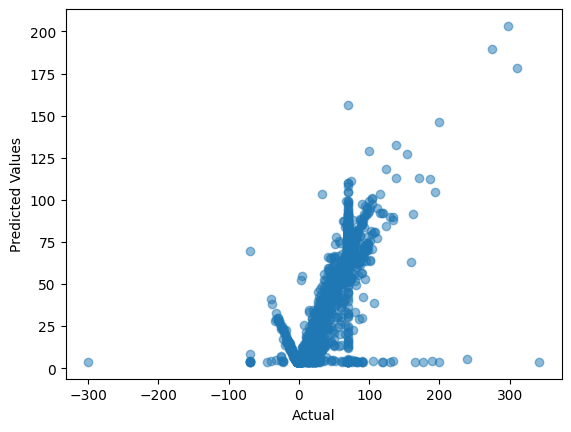

In [54]:
# # Install necessary libraries
# !pip install sklearn

# Import required modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Linear Regression model
linear = LinearRegression()

# Fit the model to the training data (Use train_x, train_y, and linear.fit function)
### TODO: YOUR CODE HERE
linear.fit(train_x, train_y)

# Predict the target values for the test dataset (Use linear.predict function and test_x to find y_hat)
y_hat = linear.predict(test_x)  ### TODO: YOUR CODE HERE

def RMSE(true, predicted):
# Calculate the Root Mean Squared Error (RMSE) for model evaluation
  rmse = np.sqrt(mean_squared_error(test_y, y_hat)) ### TODO: YOUR CODE HERE
  return rmse

error = RMSE(test_y, y_hat)
print(f"Root Mean Squared Error (RMSE) on test data: {error:.2f}")

# Find the slope (coefficients) and intercepts
slope = linear.coef_  ### TODO: YOUR CODE HERE
intercept = linear.intercept_  ### TODO: YOUR CODE HERE
print(f"\nModel Coefficients: {slope}")
print(f"Model Intercept: {intercept:.2f}")

import matplotlib.pyplot as plt
# Add plots to visualize the difference between actual vs predicted values
### TODO: YOUR CODE HERE
plt.scatter(test_y, y_hat, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted Values')
plt.show()


### 3. Craft Your Linear Regression Algorithm (6pt)
Delve into the foundations of linear regression by constructing your own model to make predictions on the dataset.

While detailed annotations will guide your implementation, do not use external libraries such as scikit-learn. Using the numpy library is permitted.

Begin your exploration by understanding the closed form solution for linear regression. Subsequently, familiarize yourself with the gradient descent methodology.



In [55]:
X_ = train_x
print(X_.shape)
w = np.random.randn(4)
print(w.shape)
print((np.dot(X_, w[1:])+w[0]).shape, len(X_))

(71514, 3)
(4,)
(71514,) 71514


In [56]:
import numpy as np
# print(train_y.shape)
# diff = train_y-(np.dot(X_, w[1:])+w[0])
# dw = np.dot(X_.T, diff)
# print(dw.shape, dw)
# w = np.zeros(X_.shape[1]+1)
# print(w)
# for i in range(X_.shape[1]+1):
#   w[i] = np.random.uniform(low=-1, high=1)
# print(w)

In [57]:
from numpy import *

class Linear:

    w = None

    def __init__(self, eta=0.01, epoch=100):
      self.w = None
      self.eta = eta
      self.epoch = epoch

    def setEta(self, etaVal):
      self.eta = etaVal

    def setEpoch(self, nepoch):
      self.epoch = nepoch

    def predict(self, X):
      """
      Perform inference
      """
      ### TODO: YOUR CODE HERE
      if self.w is None:
        raise ValueError("Not trained yet.")
      return np.dot(X, self.w[1:])+self.w[0]

    def train(self, X, Y):
      """
      Construct a vanilla linear regressor using gradient descent.
      """
      ### TODO: YOUR CODE HERE
      self.w = np.zeros((X.shape[1]+1,1))
      for _ in range(self.epoch):
        y_hat = np.dot(X, self.w[1:])+self.w[0]
        diff = 2*(y_hat- Y)
        X_ = np.transpose(X, (1,0))
        dw = np.dot(X_, diff)
        db = np.sum(diff, axis=0)
        self.w[1:] -= self.eta * dw
        self.w[0] -= self.dta * db
      return self.w



In [58]:
def RMSE(y_test, y_hat):
    """
    Return Root Mean Squared Error
    """
    ### TODO : YOUR CODE HERE
    rmse = np.sqrt(np.mean((y_test - y_hat)**2))
    return rmse

In [59]:
model = Linear()

In [ ]:
model.train(train_x, train_y)

In [ ]:
y_hat = model.predict(test_x)
print(y_hat)

In [ ]:
error = RMSE(test_y, y_hat)
print(error)